# If a service is free, you are the product: Profitable free app profiles for the AppStore and Google Play markets

![banner](https://scholarlyoa.com/wp-content/uploads/2021/06/Mobile-App.jpg)

##  Abstract

A great deal of the IT world is directed towards software development. Looking at today's market, we can see most of the apps are free, and so we analyze the two major markets to profile the most profitable apps, which is directly related to their popularity. We arbitrarily determined success to be placed among the top 2% in user numbers, and also took median user numbers and how well each category is evaluated to calculate potential for extra revenue within the app. Our findings/results were:


Agressive strategy(top 2%):

* Operating system: Android
    
* Category: social_networking/communications/messenger and Bible apps are universally successful.
    - Android: photo_and_videos, shopping, games; 
    - iOS: navigation, "food_and_drink" and "social_networking"
* Content rating: 
    - Android= 9+;
    - iOS = 12+;

Conservative strategy(best overall):
* Operating system: Android

* Category:  
    - Android: entertainment, photo_and_video, shopping, education.
    - iOS: navigation, productivity, shopping;
    
* Content_rating:
    - Android= 9+;
    - iOS = 12+;
    

Most extra revenue potential:

    - Android: health_and_fitness, education, books_and_reference;
    
    - iOS: health_and_fitness, games, photo_and_video, productivity

## Table of Contents

1. [**Introduction**](#section1)
2. [**Goals and limitations**](#section2)
3. [**Methodology**](#section3)
4. [**Data Exploration**](#section4)

    4.1 [**Exploring Android**](#section4.1)
    
    4.2 [**Exploring iOS**](#section4.2)
    
5. [**Data Cleaning and transformation**](#section5)

    5.1 [**Data Cleaning and Transformation Android**](#section5.1)
    
    5.2 [**Data Cleaning and Transformation iOS**](#section5.2)
    
6. [**Data Visualization and Analysis**](#section6)

    6.1 [**Grouping by Operating System**](#section6.1)
    
7. [**Data Visualization and Analysis for Android**](#section7)

    7.1 [**Defining data subset and success for Android**](#section7.1)
    
    7.2 [**Grouping by category for Android **](#section7.2)
    
    7.3 [**Grouping by cont_rating_min_age for Android**](#section7.3)
    
8. [**Data Visualization and Analysis for iOS**](#section8)

    8.1 [**Defining data and success for iOS**](#section8.1)
    
    8.2 [**Grouping by category for iOS**](#section8.2)
    
    8.3 [**Grouping by cont_rating_min_age for iOS**](#section8.3)
    
9. [**Conclusion**](#section9)

## 1. Introduction <a name="section1"></a>

It is the glamourized IT storyline: your character learns to code, starts developing one's own softwares, and becomes a sylicon valley master lord out of nowhere. 

But how would the average Joe go about it in the real world, if in today's market, most digital access is via mobile and the majority of apps are usually free? Advertisement-based revenue! 

## 2. Goals and limitations <a name="section2"></a>

In this project, we look into two datasets for the major mobile software stores, both from kaggle:
- [Google Play](https://www.kaggle.com/datasets/lava18/google-play-store-apps) with approximately 10,000 apps, and;
- [App Store](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps) with approximately 7,000 entries.

We aim to profile mobile apps which can make a profit in the aforementioned system stores by attracting the most users (since our revenue is in app-adds). We will recommend apps considering an agressive strategy (chances of being on top 2% of most popular apps), a conservative strategy(better performance overall by median values), and apps with most potential of extra revenue(better public evaluation, by median ratings). Thus, we'll enable data-driven decisions regarding which kinds of applications to produce.

Some of the complications we face with this dataset are as follows:
* different segmentation by os in categorical variables such as 'categories' and 'content_rating';
* GooglePlayStore has unintuitive classifications, marking "Duolingo" as a game rather than educational, or "Fifa2020" and EA's "NBA" as sports, and not games;
* there are no entries for any music apps in the Google Play store;
* the markets behave very differently (AppStore has a much higher saturation than GooglePlayStore) and it makes a combined analysis unrealistic. We proceed to analyze them separately;

## 3. Methodology and Metadata <a name="section3"></a>

We will proceed to analyze the data from csv files with regular expressions, pandas and numpy libraries, trying to spot patterns, common qualifiers and outliers with visualization tools (mostly heatmaps and relational plots from seaborn).

To measure app popularity, in this project we will use the number of ratings available for Google Chrome and iOS as a proxy for number of users. A better metric would be 'Installs', available for Android, but there is no such data for iOS.

AppleStore data:
    
Data collection date (from API);
July 2017

Dimension of the data set;
7197 rows and 16 columns

Content:
appleStore.csv
"id" : App ID
"track_name": App Name
"size_bytes": Size (in Bytes)
"currency": Currency Type
"price": Price amount
"rating_count_tot": User Rating counts (for all version)
"rating_count_ver": User Rating counts (for current version)
"user_rating" : Average User Rating value (for all version)
"user_rating_ver": Average User Rating value (for current version)
"ver" : Latest version code
"cont_rating": Content Rating
"prime_genre": Primary Genre
"sup_devices.num": Number of supporting devices
"ipadSc_urls.num": Number of screenshots showed for display
"lang.num": Number of supported languages
"vpp_lic": Vpp Device Based Licensing Enabled

GoogleStore data: similar data, for 10.000 apps

## 4. Data Exploration <a name="section4"></a>

In this step, we will fetch the data as panda dataframes and check for data integrity and conformity, as instructions in the subitems below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from csv import reader

plt.style.use('fivethirtyeight')
sns.set(style='darkgrid')

android=pd.read_csv('googleplaystore.csv')
ios=pd.read_csv('AppleStore.csv')

### 4.1 Exploring Android <a name="section4.1"></a>

In this segment for Android, we will:
* (1): Check for data type;
* (2): missing/repeated data 
* (3): most common qualifiers;
* (4): unwanted columns and reasonableness

In [2]:
#(1) Check for data type
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [3]:
#(1) Check for data type
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We should expect 'rating', 'reviews', 'size', 'Price', 'Installs' to be integers; 'Type' to be a boolean(maybe change the name to 'Free'), and 'last updated' to be a datetime object.

In [4]:
#(2)missing/repeated data and most common qualifiers
android.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0.8499999999999819, 'Columns')

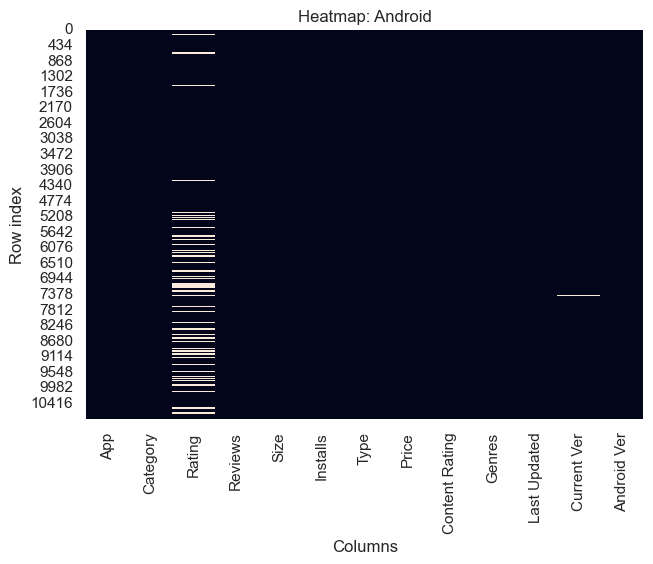

In [5]:
#(2)missing/repeated data 
sns.heatmap(android.isnull(), cbar=False)
plt.title('Heatmap: Android')
plt.ylabel('Row index')
plt.xlabel('Columns')

In [6]:
#(2) missing/repeated data 
#duplicated 'App' values
duplicates_android = android.duplicated(['App'])
android[duplicates_android]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [7]:
#(2) missing/repeated data
#how many duplicated entries by app
duplicates_android_apps = android.duplicated(['App'])
android[duplicates_android_apps]['App'].value_counts().head(20)

ROBLOX                                                8
CBS Sports App - Scores, News, Stats & Watch Live     7
8 Ball Pool                                           6
Duolingo: Learn Languages Free                        6
Candy Crush Saga                                      6
ESPN                                                  6
Bleacher Report: sports news, scores, & highlights    5
Bowmasters                                            5
Zombie Catchers                                       5
Temple Run 2                                          5
Bubble Shooter                                        5
Sniper 3D Gun Shooter: Free Shooting Games - FPS      5
Nick                                                  5
Subway Surfers                                        5
Helix Jump                                            5
slither.io                                            5
Farm Heroes Saga                                      4
Yahoo Fantasy Sports - #1 Rated Fantasy App     

There are around 1500 missing values in the 'reviews' column in this Android dataset, but otherwise it is complete. This won't be a problem going forward as we will use 'Installs" to gauge user numbers. There are 487 fully doubled rows, but 1181 repeated entries within apps (11%). There are 16 apps that repeat 5 or more times in the dataset.

There are some top most common qualifiers that can be seen in the 'describe()' table:
* 92.25% of the apps listed are free
* the most frequent Category is "FAMILY", with 18% of the dataset
* the majority of Installs can be described as '1,000,000+', with roughly 1500 rows of the dataset (14%).
* the most common Content rating is 'Everyone', ranging 80% of the dataset

In [8]:
#(3) most common qualifiers
#most popular apps in general
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(android[android['Installs']=='500,000,000+'][['App', 'Category', 'Installs']].sort_values(by='Category'))

,App,Category,Installs
342,Viber Messenger,COMMUNICATION,"500,000,000+"
4222,imo free video calls and chat,COMMUNICATION,"500,000,000+"
4676,Viber Messenger,COMMUNICATION,"500,000,000+"
3971,UC Browser - Fast Download Private & Secure,COMMUNICATION,"500,000,000+"
4039,Google Duo - High Quality Video Calls,COMMUNICATION,"500,000,000+"
474,LINE: Free Calls & Messages,COMMUNICATION,"500,000,000+"
467,Viber Messenger,COMMUNICATION,"500,000,000+"
465,imo free video calls and chat,COMMUNICATION,"500,000,000+"
4122,LINE: Free Calls & Messages,COMMUNICATION,"500,000,000+"
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,"500,000,000+"


Text(0, 0.5, 'Number of apps')

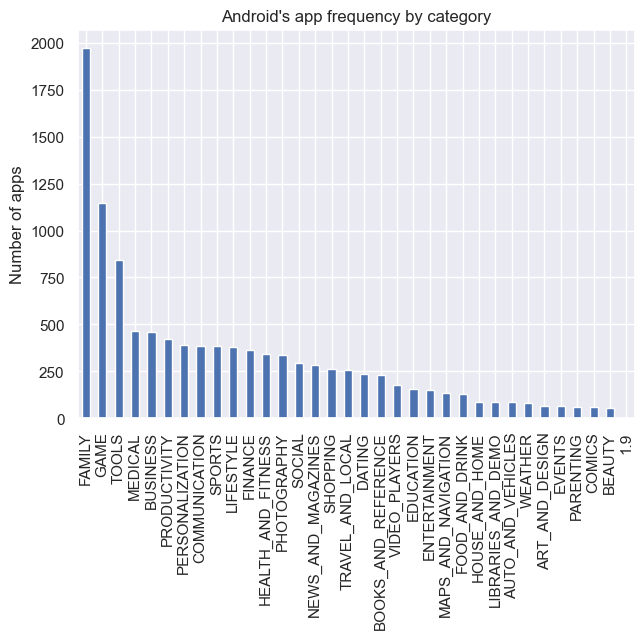

In [9]:
#(3) most common qualifiers
# most populated categories
android['Category'].value_counts(dropna=False).plot(kind='bar', title="Android's app frequency by category")
plt.ylabel('Number of apps')

In [10]:
#(3) most common qualifiers
# most popular apps within each category
for cat in android['Category'].value_counts(dropna=True).index:
    print(android[android['Category']==cat][['Category', 'App', 'Installs']].sort_values(by='Installs', ascending=False)[0:9])
    print('...')

     Category                                             App      Installs
3994   FAMILY                                Candy Crush Saga  500,000,000+
3888   FAMILY                                  My Talking Tom  500,000,000+
3879   FAMILY                                             Pou  500,000,000+
4077   FAMILY                            E-cigarette for free      500,000+
7027   FAMILY  UNICORN - Color By Number & Pixel Art Coloring      500,000+
9981   FAMILY                                  PokeType - Dex      500,000+
4533   FAMILY                          R. Physics Puzzle Game      500,000+
2098   FAMILY   Extreme Racing 2 - Real driving RC cars game!      500,000+
9478   FAMILY                            Farming Simulator 16      500,000+
...
     Category               App      Installs
1869     GAME  Candy Crush Saga  500,000,000+
1842     GAME  Candy Crush Saga  500,000,000+
4041     GAME      Temple Run 2  500,000,000+
1920     GAME      Temple Run 2  500,000,000+
1729  

In [11]:
#(3)most common qualifiers
android['Content Rating'].value_counts(ascending=False, dropna=False)


Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
NaN                   1
Name: Content Rating, dtype: int64

The 3 most common categories for Android are FAMILY, GAME, TOOLS, but that does not necessarily mean there are no major blockbusters within other categories: 'NEWS_AND_MAGAZINES' and 'COMMUNICATION' have all top 6 with more than 500,000,000 users.

We can see that in some categories, when ranked by the number of installs, apps with more users are listed below less popular apps. That is the case in the "PARENTING" , "EVENTS", "BEAUTY". This suggests typos in the strings, and this colum as a whole should be converted to integer before deleting rows to avoid confusion.

In [12]:
#(4)unwanted columns and reasonableness
android['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [13]:
#(4) unwanted columns and reasonableness
android[android['Type']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
#(4)unwanted columns and reasonableness
android[android['Category']=='FAMILY'].sort_values(by='Installs', ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3888,My Talking Tom,FAMILY,4.5,14885236,Varies with device,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
3879,Pou,FAMILY,4.3,10483141,24M,"500,000,000+",Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
4077,E-cigarette for free,FAMILY,3.6,1354,4.8M,"500,000+",Free,0,Mature 17+,Entertainment,"October 23, 2017",1.0,2.3 and up
7027,UNICORN - Color By Number & Pixel Art Coloring,FAMILY,4.7,8264,24M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5126,Michael's AG Sound Board,FAMILY,NaN,0,1.7M,1+,Paid,$0.99,Everyone,Entertainment,"December 12, 2017",1.1,1.6 and up
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,NaN,4,64M,1+,Free,0,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
5486,AP Series Solution Pro,FAMILY,NaN,0,7.4M,0+,Paid,$1.99,Everyone,Education,"July 30, 2017",1.3,4.0 and up
5945,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33M,0+,Paid,$2.99,Everyone,Education,"April 15, 2016",1.0,3.0 and up


Over 90% of the apps for Android are free. We have one entry that is marked as type '0' instead of 'Free', and taking a closer look, all of its columns are misplaced one column to the left (missing entry in 'Category').

The sorting of apps according to Categories seem really lose, for we have repeated entries of the same app appearing in more than one label: we know for sure Candy Crush is a Game, even though it also shows under "FAMILY". We can't so far perfect this sorting automatically, so these inconsistencies here are likely to remain.

Row index 10472 is missing its category, and all other values are placed one column to their left. This value should be dropped.

Not only do we have unwanted columns: the 4 last ones, price(we will filter by 'type'), size, rating,  but we also have unwanted rows: apps that are not written in roman characters, such as index 4550 (above).  

#### Summary of Android exploration:

* (1) 'Type' to be a boolean, 'Installs' to be integers
* (2) 1181 repeated entries within apps(11%), only missing values in 'ratings'(12%)
* (3) The most common qualifiers are: 
    - Category: "FAMILY"(14%), "GAME"(8%), "TOOLS(6%)"
    - Content rating: "Everyone"(80%), "Teen(11%)"
    - Installs: '1,000,000+'(18%), '100,000+'(12%), '10,000,000+'(12%)
    - Type: 'Free'(>90%)
* (4) Unwanted: rows = foreign apps; columns = 'size', 'price', 'rating', last 4 columns, row index 10472

### 4.2  Exploring iOS <a name="section4.2"></a>

In this segment for iOS, we will:
* (1): Check for data type;
* (2): missing/repeated data 
* (3): most common qualifiers;
* (4): unwanted columns and reasonableness

In [15]:
#(1) Check for data type
ios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [16]:
#(1) Check for data type
ios.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


The data types in iOS look intuitively correct and nothing stands out at a first glance. There seems to be no missing data.

In [17]:
#(2)missing/repeated data and most common qualifiers
ios.describe(include='all')

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7197,7.197000e+03,7197,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197,7197,7197,7197.000000,7197.000000,7197.000000,7197.000000
unique,NaN,NaN,7195,NaN,1,NaN,NaN,NaN,NaN,NaN,1590,4,23,NaN,NaN,NaN,NaN
top,NaN,NaN,VR Roller Coaster,NaN,USD,NaN,NaN,NaN,NaN,NaN,1.0,4+,Games,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,NaN,7197,NaN,NaN,NaN,NaN,NaN,317,4433,3862,NaN,NaN,NaN,NaN
mean,4759.069612,8.631310e+08,NaN,1.991345e+08,NaN,1.726218,1.289291e+04,460.373906,3.526956,3.253578,NaN,NaN,NaN,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,NaN,3.592069e+08,NaN,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,NaN,NaN,NaN,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,NaN,5.898240e+05,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,NaN,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,NaN,4.692275e+07,NaN,0.000000,2.800000e+01,1.000000,3.500000,2.500000,NaN,NaN,NaN,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,NaN,9.715302e+07,NaN,0.000000,3.000000e+02,23.000000,4.000000,4.000000,NaN,NaN,NaN,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,NaN,1.819249e+08,NaN,1.990000,2.793000e+03,140.000000,4.500000,4.500000,NaN,NaN,NaN,38.000000,5.000000,8.000000,1.000000


Text(0.5, 0.7093749999999819, 'Columns in dataset')

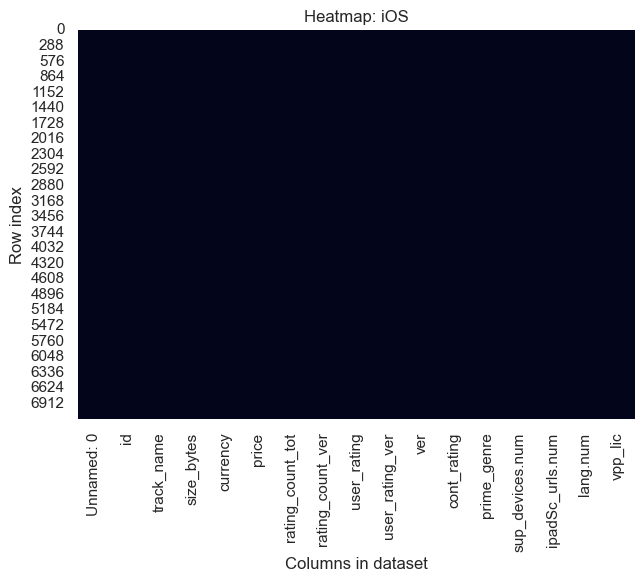

In [18]:
#(2) missing/repeated data 
sns.heatmap(ios.isnull(), cbar=False)
plt.title('Heatmap: iOS')
plt.ylabel('Row index')
plt.xlabel('Columns in dataset')

In [19]:
#(2) missing/repeated data 
#fully duplicated rows
duplicates_ios = ios.duplicated()
ios[duplicates_ios]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic


In [20]:
#(2) missing/repeated data 
#duplicated 'track name' values
duplicates_ios_track = ios.duplicated('track_name')
ios[duplicates_ios_track]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
5603,7579,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1
7128,10885,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1


In [21]:
duplicated_ios_id = ios.duplicated('id')
ios[duplicated_ios_id]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic


There are only two repeated entries for 'track_name' the whole iOS operating system dataset.

There are some top most common qualifiers that can be seen in the 'describe()' table:
* the median of the price distribution is free, and the 75% quartile under 1.99;
* the most common prime_genre is "games"(57%), all others below 7,5%;
* the count_rating_tot distribution has a 75% quartile of 2789 and a maximum value of nearly 3M;
* the most common content_rating is 4+ (60%).

In [22]:
#(3) most common qualifiers
#most popular apps in general
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ios[['track_name', 'prime_genre', 'rating_count_tot']].sort_values(by='rating_count_tot', ascending=False).head(100).sort_values(by='prime_genre'))

,track_name,prime_genre,rating_count_tot
82,"Kindle – Read eBooks, Magazines & Textbooks",Book,252076
78,Pocket God,Entertainment,187529
358,Netflix,Entertainment,308844
112,Fandango Movies - Times + Tickets,Entertainment,291787
3942,Colorfy: Coloring Book for Adults,Entertainment,247809
73,"Mint: Personal Finance, Budget, Bills & Money",Finance,232940
67,Chase Mobile℠,Finance,233270
209,Starbucks,Food & Drink,303856
810,Domino's Pizza USA,Food & Drink,258624
1547,Dragon City Mobile,Games,277268


Text(0, 0.5, 'Number of apps')

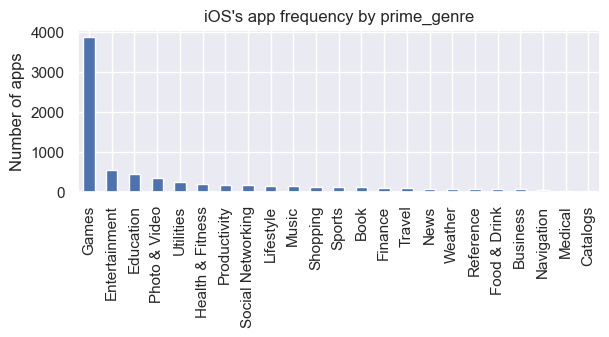

In [23]:
#(3) most common qualifiers
# most populated categories
ios['prime_genre'].value_counts(dropna=False).plot(figsize=(6,2), kind='bar', title="iOS's app frequency by prime_genre")
plt.ylabel('Number of apps')

In [24]:
#(3) most common qualifiers
#most popular apps within each prime_genre
for genre in ios['prime_genre'].value_counts(dropna=False).index:
    print(ios[ios['prime_genre']==genre][['prime_genre', 'track_name', 'rating_count_tot']].sort_values(by='rating_count_tot', ascending=False)[0:9])
    print('xxx')

     prime_genre                           track_name  rating_count_tot
1346       Games                       Clash of Clans           2130805
707        Games                           Temple Run           1724546
1493       Games                     Candy Crush Saga            961794
275        Games                          Angry Birds            824451
1246       Games                       Subway Surfers            706110
348        Games                  Fruit Ninja Classic            698516
343        Games                            Solitaire            679055
990        Games                           CSR Racing            677247
3042       Games  Crossy Road - Endless Arcade Hopper            669079
xxx
        prime_genre                                 track_name  \
358   Entertainment                                    Netflix   
112   Entertainment          Fandango Movies - Times + Tickets   
3942  Entertainment          Colorfy: Coloring Book for Adults   
78    Entert

In [25]:
#(3) most common qualifiers
ios['cont_rating'].value_counts(ascending=False, dropna=False)

4+     4433
12+    1155
9+      987
17+     622
Name: cont_rating, dtype: int64

([<matplotlib.axis.XTick at 0x1fff545a730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

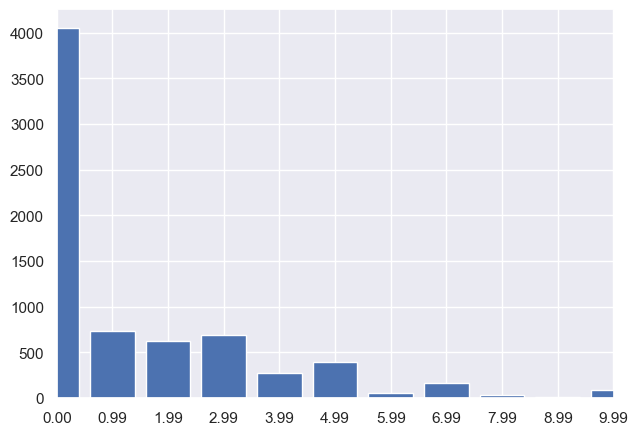

In [26]:
#(3) most common qualifiers
plt.bar(list(ios['price'].value_counts(ascending=False).sort_index().index), list(ios['price'].value_counts(ascending=False).sort_index().values))
plt.xlim([0,10])
plt.xticks(ticks=[0,0.99,1.99,2.99,3.99,4.99,5.99,6.99,7.99,8.99,9.99])

The three most populated prime_genres in iOS are Games - which dominates the pack-, Entertainment and Education, and the labelling method applied seems more coherent as a whole when compared to Android. Again, we won't be able to escape poor classification, such as we can see in "lifestyle", where dating apps and housing catalogs are mixed together, or Instagram not being within social networking.

Unlike Android, the iOS dataset sorts out listed values perfectly, despite the reservations mentioned previously regarding the metric for user numbers. On that topic, it would be interesting to draw a correlation table on the android dataset to reveal how trustworthy this metric really is of user numbers (compare correlation between installs and other variables, along with number of reviews.)

'Category' on Android and 'prime_genre' on iOS seem to be somewhat similar in variety, as well as Content_rating(Android) and cont_rating(iOS).

In [27]:
#(4)unwanted columns/rows
ios[ios['prime_genre']=='Games'][['track_name', 'rating_count_tot', 'cont_rating']].sort_values(by='rating_count_tot', ascending=False)

,track_name,rating_count_tot,cont_rating
1346,Clash of Clans,2130805,9+
707,Temple Run,1724546,9+
1493,Candy Crush Saga,961794,4+
275,Angry Birds,824451,4+
1246,Subway Surfers,706110,9+
...,...,...,...
6652,シカクイズ -暇つぶしマンガアニメ映画クイズ-暇つぶしに最適,0,4+
6649,[GP]ハナハナホウオウ-30(パチスロゲーム),0,12+
5063,巨商传奇,0,17+
6002,【脳トレ】ROLL -ころがす、はめる、きえる-,0,4+


For our purposes, we can drop the 'id','unnamed', "rating_count_ver", "user_rating_ver", "ver", "sup_devices.num", "ipadSc_urls.num", "lang.num", "vpp_lic", 'price', 'currency' columns from this iOS dataset. The price column would better turn into a 'free' boolean column, like in Android.

There doesn't seem to be repeated apps like for Android. There are still, however, many apps in languages other than English. Other than the points mentioned above, the data seems reasonable.

#### Summary of iOS exploration:

* (1) 'price' should turn into a boolean column named 'free'
* (2) No fully duplicated rows, only 2 duplicated app entries. No missing data.
* (3) The most common qualifiers are:
    - the median of the price distribution is free, and the 75% quartile under 1.99;
    - the most common prime_genre is "games"(57%), all others below 7,5%;
    - the count_rating_tot distribution has a 75% quartile of 2789 and a maximum value of nearly 3M;
    - the most common content_rating is 4+ (60%).
* (4) Unwanted: rows = foreign apps; columns = 'id','unnamed', "rating_count_ver", "user_rating_ver", "ver", "sup_devices.num", "ipadSc_urls.num", "lang.num", "vpp_lic", 'price'

## 5. Data cleaning and transformation<a name="section5"></a>

### 5.1 Data Cleaning and transformation for Android<a name="section5.1"></a>

Based on preliminary observations for Android, we will:
* (0) Standardize column names - iOS names are better;
* (1) Datatypes: correct Type(free) to boolean, 'ratings', 'reviews' , 'installs' to numeric;
* (2) Duplicated/missing: drop all 1181 rows with duplicated apps after sorting by rating_count_tot, so to keep the first entry;
* (3) Most common qualifiers: drop all 800 non-free apps;
* (4) Drop unwanted:  rows = foreign apps(3 or more non-ascii characters); columns = 'size', 'price', 'rating', last 4 columns;
* (5) Manipulate data to fully standardize it

In [28]:
android.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [29]:
#(0) Padronize column names(snake_case)
change = {'App': 'app', 'Category':'category', 'Rating':'user_rating', 'Reviews':'rating_count_tot', 'Size':'size_bytes', 'Installs':'installs', 'Type':'free',
       'Price':'price_usd', 'Content Rating':'cont_rating_min_age', 'Genres':'genres'}
android_updated = android.copy().rename(change, axis=1)

In [30]:
#(1) Datatypes: correct Type(free) to boolean, 'ratings', 'reviews' , 'installs' to numeric;
android_updated=android_updated.drop([10472])
android_updated['free']=android_updated['free']=='Free'
android_updated['installs'] = android_updated['installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(int)
android_updated[['user_rating', 'rating_count_tot']] = android_updated[['user_rating', 'rating_count_tot']].apply(pd.to_numeric) 
android_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   app                  10840 non-null  object 
 1   category             10840 non-null  object 
 2   user_rating          9366 non-null   float64
 3   rating_count_tot     10840 non-null  int64  
 4   size_bytes           10840 non-null  object 
 5   installs             10840 non-null  int32  
 6   free                 10840 non-null  bool   
 7   price_usd            10840 non-null  object 
 8   cont_rating_min_age  10840 non-null  object 
 9   genres               10840 non-null  object 
 10  Last Updated         10840 non-null  object 
 11  Current Ver          10832 non-null  object 
 12  Android Ver          10838 non-null  object 
dtypes: bool(1), float64(1), int32(1), int64(1), object(9)
memory usage: 1.0+ MB


In [31]:
#(2) Duplicated/missing: drop all 1181 rows with duplicated apps after sorting by rating_count_tot, so to keep the first entry
android_updated_uniques = android_updated.sort_values('rating_count_tot', ascending=False).drop_duplicates(['app'], keep='first')
android_updated_uniques.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 2544 to 5086
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   app                  9659 non-null   object 
 1   category             9659 non-null   object 
 2   user_rating          8196 non-null   float64
 3   rating_count_tot     9659 non-null   int64  
 4   size_bytes           9659 non-null   object 
 5   installs             9659 non-null   int32  
 6   free                 9659 non-null   bool   
 7   price_usd            9659 non-null   object 
 8   cont_rating_min_age  9659 non-null   object 
 9   genres               9659 non-null   object 
 10  Last Updated         9659 non-null   object 
 11  Current Ver          9651 non-null   object 
 12  Android Ver          9657 non-null   object 
dtypes: bool(1), float64(1), int32(1), int64(1), object(9)
memory usage: 952.7+ KB


In [32]:
#(2) Duplicated/missing: fill in user_rating with the average of the category the app belongs to.
rating_by_cat = np.round(android_updated_uniques[android_updated_uniques['user_rating'].notnull()].pivot_table('user_rating', 'category'), 2).rename({'user_rating': 'user_rating_avg'}, axis=1)
rating_by_cat

,user_rating_avg
category,
ART_AND_DESIGN,4.36
AUTO_AND_VEHICLES,4.19
BEAUTY,4.28
BOOKS_AND_REFERENCE,4.34
BUSINESS,4.10
COMICS,4.18
COMMUNICATION,4.12
DATING,3.98
EDUCATION,4.35


In [33]:
#(2) Duplicated/missing: fill in user_rating with the average of the category the app belongs to.
android_updated_merged = android_updated_uniques.merge(rating_by_cat, how='left', on='category')
android_updated_merged['user_rating'] = android_updated_merged['user_rating'].fillna(android_updated_merged['user_rating_avg'])

In [34]:
#(3) Most common qualifiers: drop all 800 non-free apps;
android_free = android_updated_merged[android_updated_merged['free']]
android_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8904 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   app                  8904 non-null   object 
 1   category             8904 non-null   object 
 2   user_rating          8904 non-null   float64
 3   rating_count_tot     8904 non-null   int64  
 4   size_bytes           8904 non-null   object 
 5   installs             8904 non-null   int32  
 6   free                 8904 non-null   bool   
 7   price_usd            8904 non-null   object 
 8   cont_rating_min_age  8904 non-null   object 
 9   genres               8904 non-null   object 
 10  Last Updated         8904 non-null   object 
 11  Current Ver          8898 non-null   object 
 12  Android Ver          8903 non-null   object 
 13  user_rating_avg      8904 non-null   float64
dtypes: bool(1), float64(2), int32(1), int64(1), object(9)
memory usage: 947.8+ KB


In [35]:
#(4) Drop unwanted: columns = 'size', 'price', last 4 columns, 'user_rating_avg'
android_dropped = android_free.drop(['size_bytes','genres', 'Last Updated', 'Current Ver', 'Android Ver', 'price_usd', 'user_rating_avg'], axis=1)
android_dropped.columns

Index(['app', 'category', 'user_rating', 'rating_count_tot', 'installs',
       'free', 'cont_rating_min_age'],
      dtype='object')

In [36]:
#(4) Drop unwanted rows = foreign apps(non latin characters)
three_ascii_mask = android_dropped['app'].str.count(r'[^\x00-\x7F]').gt(3)
android_english = android_dropped[~three_ascii_mask]

Text(0.5, 1.0, 'Heatmap: Android')

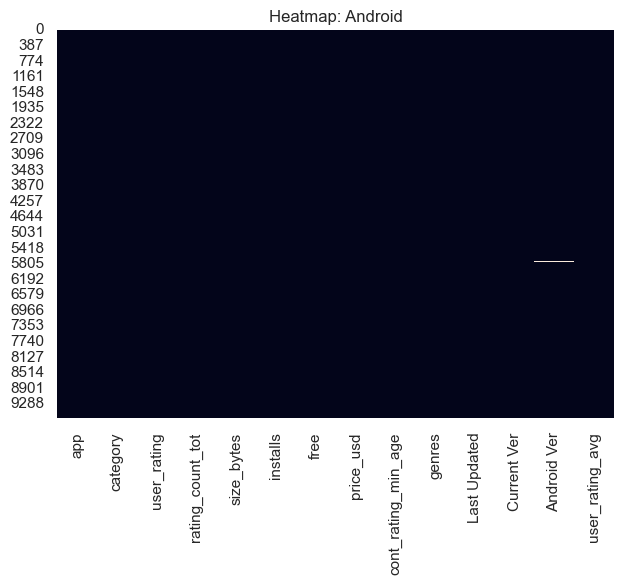

In [37]:
sns.heatmap(android_updated_merged.isnull(), cbar=False)
plt.title('Heatmap: Android')

In [38]:
#(5) Manipulate data to fully standardize it
mapping_cont_rating = {
    'Everyone':4,
    'Teen':12,
    'Everyone 10+':9,
    'Mature 17+':17,
    'Adults only 18+':17,
    'Unrated':17,
}
android_english = android_english.copy()
android_english['cont_rating_min_age']=android_english['cont_rating_min_age'].str.strip().map(mapping_cont_rating)
android_english['category'] = android_english['category'].str.capitalize()
android_english['os']='android'

In [39]:
#(5) Manipulate data to fully standardize it
mapping_category = {
    'Art_and_design': 'Catalogs',
    'Auto_and_vehicles':'Catalogs' ,
    'Beauty':'Catalogs',
    'Books_and_reference': 'Books_and_reference',
    'Business':'Business',
    'Comics': 'Catalogs',
    'Communication': 'Social_Networking',
    'Dating':'Lifestyle',
    'Education': 'Education',
    'Entertainment': 'Entertainment',
    'Events': 'Catalogs',
    'Family': 'Games',
    'Finance': 'Finance',
    'Food_and_drink': 'Food_and_drink',
    'Game':'Games',
    'Health_and_fitness': 'Health_and_fitness',
    'House_and_home': 'Catalogs',
    'Libraries_and_demo':'Books_and_reference',
    'Lifestyle': 'Lifestyle',
    'Maps_and_navigation': 'Navigation',
    'Medical': 'Medical',
    'News_and_magazines': 'News',
    'Parenting':'Utilities',
    'Personalization':'Utilities',
    'Photography': 'Photo_and_video',
    'Productivity': 'Productivity',
    'Shopping':'Shopping',
    'Social': 'Social_Networking',
    'Sports': 'Sports',
    'Tools': 'Utilities',
    'Travel_and_local':'Travel',
    'Video_players': 'Photo_and_video',
    'Weather':'Weather'
}
android_english['category']=android_english['category'].str.strip().map(mapping_category).str.lower()
android_english.head()

,app,category,user_rating,rating_count_tot,installs,free,cont_rating_min_age,os
0,Facebook,social_networking,4.1,78158306,1000000000,True,12,android
1,WhatsApp Messenger,social_networking,4.4,69119316,1000000000,True,4,android
2,Instagram,social_networking,4.5,66577446,1000000000,True,12,android
3,Messenger – Text and Video Chat for Free,social_networking,4.0,56646578,1000000000,True,4,android
4,Clash of Clans,games,4.6,44893888,100000000,True,9,android


In [40]:
#(5) Manipulate data to fully standardize it: if 'rating_count_tot' has a strong correlation w/ 'installs', 
#we can use one for the other in the datasets
android_english.corr()

,user_rating,rating_count_tot,installs,free,cont_rating_min_age
user_rating,1.000000,0.059203,0.044308,NaN,0.009313
rating_count_tot,0.059203,1.000000,0.624564,NaN,0.046752
installs,0.044308,0.624564,1.000000,NaN,0.035877
free,NaN,NaN,NaN,NaN,NaN
cont_rating_min_age,0.009313,0.046752,0.035877,NaN,1.000000


This correlation table validates the analysis based on rating_count_tot (0.61); it would probably be an even better mark if the android dataset contained the exact numbers of installs, instead of only ranges of it.

Insterestingly, user_rating has technically nothing to do with the amount of user an app has.

In [41]:
android_ready= android_english.drop('installs', axis=1)

In [42]:
android_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 9658
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   app                  8863 non-null   object 
 1   category             8863 non-null   object 
 2   user_rating          8863 non-null   float64
 3   rating_count_tot     8863 non-null   int64  
 4   free                 8863 non-null   bool   
 5   cont_rating_min_age  8863 non-null   int64  
 6   os                   8863 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 493.4+ KB


### 5.2 Data Cleaning and transformation for iOS<a name="section5.2"></a>

Based on preliminary observations for both datasets, we will:
* (0) standardize column names
* (1) 'price' should turn into a boolean 'free' column
* (2) Drop 2 duplicated app entries
* (3) Most common qualifiers: drop paid apps
* (4) Unwanted: rows = foreign apps; columns = 'id','unnamed', "rating_count_ver", "user_rating_ver", "ver", "sup_devices.num", "ipadSc_urls.num", "lang.num", "vpp_lic", 'price'
* (5) Manipulate data to fully standardize it: 'os' column, check other columns

In [43]:
#(0) Padronize column names(snake_case)
change = {'track_name': 'app', 'prime_genre':'category',
       'price':'price_usd', 'cont_rating':'cont_rating_min_age'}
ios_updated=ios.copy().rename(change, axis=1)

In [44]:
#(1) 'price should turn into a boolean 'free' column 
ios_updated['free']=ios_updated['price_usd']==0

In [45]:
#(2) Drop 2 duplicated app entries
ios_updated_uniques = ios_updated.sort_values('rating_count_tot', ascending=False).drop_duplicates(['app'], keep='first')

In [46]:
#(3) Most common qualifiers: drop paid apps
ios_free = ios_updated_uniques[ios_updated_uniques['free']]

In [47]:
#(4) Unwnated columns:  'id','unnamed', "rating_count_ver", "user_rating_ver", "ver",
#"sup_devices.num", "ipadSc_urls.num", "lang.num", "vpp_lic", 'price', 'currency'
ios_clean = ios_free.drop(['id','Unnamed: 0', "rating_count_ver", "user_rating_ver", "ver",
"sup_devices.num", "ipadSc_urls.num", "lang.num", "vpp_lic", 'price_usd', 'size_bytes', 'currency', 'price_usd'], axis=1)

In [48]:
#(4) Unwanted rows: foreign apps (3 or more non-latin characters)
three_ascii_mask = ios_clean['app'].str.count(r'[^\x00-\x7F]').gt(3)
ios_english = ios_clean[~three_ascii_mask]

In [49]:
#(5) Transform datatypes and manipulate data to fully standardize it. 
ios_english=ios_english.copy()
ios_english['os']='ios'
ios_english['cont_rating_min_age'].str.strip().str.replace('+','', regex=True).astype(float)
map_category = {
    'Book':'Books_and_reference', 
    'Business':'Business',
    'Catalogs':'Catalogs',
    'Education':'Education',
    'Entertainment':'Entertainment',
    'Finance':'Finance',
    'Food & Drink': 'Food_and_drink',
    'Games':'Games',
    'Health & Fitness':'Health_and_fitness',
    'Lifestyle':'Lifestyle',
    'Medical':'Medical',
    'Music':'Music',
    'Navigation':'Navigation',
    'News':'News',
    'Photo & Video': 'Photo_and_video',
    'Productivity':'Productivity',
    'Reference':'Books_and_reference' ,
    'Shopping': 'Shopping',
    'Social Networking':'Social_Networking',
    'Sports':'Sports',
    'Travel':'Travel',
    'Utilities':'Utilities',
    'Weather': 'Weather'
}

ios_english['category']=ios_english['category'].str.strip().map(map_category).str.lower()

In [50]:
#(5) Manipulate data to fully standardize it
mapping_cont_rating = {
    '4+':4,
'12+':12,
'9+':9,
'17+':17,
}
ios_english['cont_rating_min_age']=ios_english['cont_rating_min_age'].str.strip().map(mapping_cont_rating)

In [51]:
ios_english.corr()

,rating_count_tot,user_rating,cont_rating_min_age,free
rating_count_tot,1.000000,0.079855,0.030066,NaN
user_rating,0.079855,1.000000,-0.019756,NaN
cont_rating_min_age,0.030066,-0.019756,1.000000,NaN
free,NaN,NaN,NaN,NaN


In [52]:
android[android['App'].str.contains('amazon', flags=re.I)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
886,Amazon Prime Video,ENTERTAINMENT,4.2,411683,24M,"50,000,000+",Free,0,Teen,Entertainment,"August 2, 2018",3.0.231.18141,4.1 and up
2654,Amazon for Tablets,SHOPPING,4.0,141613,22M,"10,000,000+",Free,0,Teen,Shopping,"July 31, 2018",16.14.0.850,4.4 and up
2664,Amazon Shopping,SHOPPING,4.3,909226,42M,"100,000,000+",Free,0,Teen,Shopping,"July 31, 2018",16.14.0.100,4.4 and up
2763,Amazon Shopping,SHOPPING,4.3,909204,42M,"100,000,000+",Free,0,Teen,Shopping,"July 31, 2018",16.14.0.100,4.4 and up
3570,Amazon Drive,PRODUCTIVITY,4.4,18669,4.1M,"1,000,000+",Free,0,Everyone,Productivity,"January 8, 2018",1.9.1.147.0-google,4.2 and up
3607,"Amazon FreeTime – Kids’ Videos, Books, & TV shows",PARENTING,4.2,2715,24M,"500,000+",Free,0,Everyone,Parenting;Music & Video,"July 24, 2018",FreeTimeApp-aosp_v3.14_Build-1.0.204367.0.13014,5.0 and up
3922,Amazon Shopping,SHOPPING,4.3,908525,42M,"100,000,000+",Free,0,Teen,Shopping,"July 31, 2018",16.14.0.100,4.4 and up
4083,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814151,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
5353,Amazon for Tablets,SHOPPING,4.0,141584,22M,"10,000,000+",Free,0,Teen,Shopping,"July 31, 2018",16.14.0.850,4.4 and up


In [53]:
android[android['App'].str.contains('spotify', flags=re.I)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Interestingly, even the Android dataset has no entries for subscription-based music apps, such as Spotify or Amazon Music.

## 6. Data Visualization and Analysis<a name="section6"></a>

Looking at the project question, we will try to group the apps according to their characteristics, so we can come up with the more successful profiles. This will take into account:
* (1) The median number of users in a group
* (2) The success rate of each group
* (3) Additionaly, we can investigate how much liked each grouping is, if we need to come up with a tie breaker.

Before proceeding, we can concatenate both datasets into one:

In [54]:
data_ready = pd.concat([android_ready, ios_english])
data_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12083 entries, 0 to 6494
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   app                  12083 non-null  object 
 1   category             12083 non-null  object 
 2   user_rating          12083 non-null  float64
 3   rating_count_tot     12083 non-null  int64  
 4   free                 12083 non-null  bool   
 5   cont_rating_min_age  12083 non-null  int64  
 6   os                   12083 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 672.6+ KB


In [55]:
data_ready.sort_values(by='user_rating', ascending=False).head(10)

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os
810,Domino's Pizza USA,food_and_drink,5.0,258624,True,4,ios
3347,CPlus for Craigslist app - mobile classifieds,catalogs,5.0,13345,True,17,ios
8270,EC Mover,games,5.0,5,True,4,android
8273,Florida Wildflowers,games,5.0,5,True,4,android
8280,Dine In CT - Food Delivery,shopping,5.0,4,True,4,android
4692,LINE RUSH !,games,5.0,15,True,9,ios
4152,VPN Proxy Master - Unlimited WiFi security VPN,productivity,5.0,13674,True,4,ios
3061,Atom – Movie Tickets and Showtimes,entertainment,5.0,4105,True,4,ios
4996,TraptionBakery,games,5.0,17,True,9,ios
8293,BxPort - Bitcoin Bx (Thailand),finance,5.0,4,True,4,android


### Defining success

Henceforth, we will establish an absolute mark of what a successful app is: being on the top 2% of user numbers.

In [56]:
success_range=round(len(data_ready)*0.02)
success_threshold = data_ready['rating_count_tot'].sort_values(ascending=False).iloc[success_range-1]
success_threshold

1502622

### 6.1 Grouping by Operating System <a name="section6.1"></a>

* (1) The median number of users in a group
* (2) The success rate of each group
* (3) Additionaly, we can investigate how much liked each grouping is, if we need to come up with a tie breaker.

In [57]:
#(1)The median of users/rating by os
data_ready_by_os = pd.pivot_table(data_ready, index=['os'], values=['user_rating','rating_count_tot'], aggfunc=[np.median])['median']
data_ready_by_os

,rating_count_tot,user_rating
os,,
android,1403,4.2
ios,1193,4.0


In [58]:
#(2) Rate of successful apps
success_rate_dict={}
count_os_dict={}
tot_installs={}
sum_apps={}
for os in data_ready['os'].value_counts(dropna=False).index:
    rating_count_by_os = data_ready[data_ready['os']==os]['rating_count_tot']
    mask_os = rating_count_by_os>success_threshold
    success_apps_amount = data_ready[data_ready['os']==os][mask_os]['rating_count_tot'].count()
    success_rate_dict[os]=success_apps_amount/rating_count_by_os.count()
    count_os_dict[os]=success_apps_amount
    tot_installs[os]=rating_count_by_os.sum()
    sum_apps[os]=rating_count_by_os.count()
data_ready_by_os['sum_apps']=data_ready_by_os.index.map(sum_apps)
data_ready_by_os['tot_installs']=data_ready_by_os.index.map(tot_installs)
data_ready_by_os['count']=data_ready_by_os.index.map(count_os_dict)
data_ready_by_os['success_rate']=data_ready_by_os.index.map(success_rate_dict)
data_ready_by_os.sort_values(by='success_rate', ascending=False).head()

,rating_count_tot,user_rating,sum_apps,tot_installs,count,success_rate
os,,,,,,
android,1403,4.2,8863,2087174421,237,0.026740
ios,1193,4.0,3220,79985148,4,0.001242


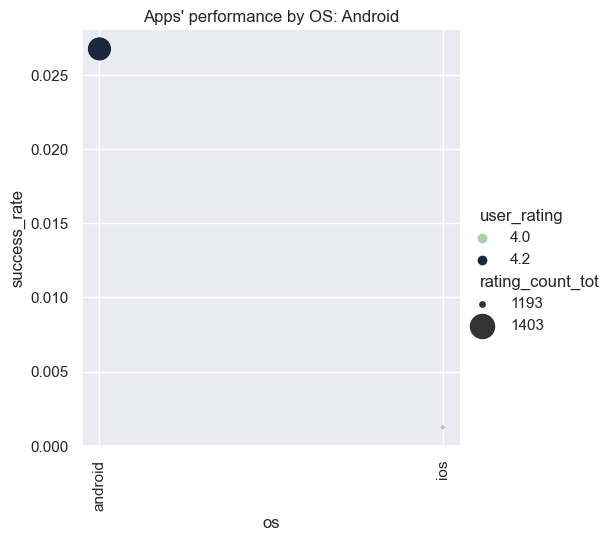

In [59]:
#(3)
sns.relplot(data=data_ready_by_os, x=data_ready_by_os.index, y='success_rate', size='rating_count_tot', hue='user_rating', sizes=(15,300), palette="ch:r=-.5,l=.75")
plt.xticks(rotation=90)
plt.title("Apps' performance by OS: Android")
plt.show()

Summing up Grouping by os:

Android has 150% more apps than ios and a total number of users 23 times more than ios. Even considering this, android apps dominate the field of successful apps with 98% of them (keeping the proportion of total users, ios should have the double of successful apps).

* Aggressive strategy: Google;
* Conservative strategy: Google;
* Most extra revenue potential: Google.
 

Going forward, we will split the data analysis between android and ios.    

## 7. Data Visualization and Analysis for Android<a name="section7"></a>

* (1) The median number of users/rating by category
* (2) Rate of successful apps

### 7.1 Defining data subset and success for Android<a name="section7.1"></a>

Henceforth, we will establish an absolute mark of what a successful app is: being on the top 2% of user numbers. The successful_by_col function will calculate:

* (1) What the success threshold is (top2% for that grouping)
* (2) The median number of users/rating by each grouping 
* (3) Rate of successful apps by each group 

In [60]:
#(1) What the success threshold is (top2% for that grouping)
def successful_by_col(col, os):
    success_rate_dict={}
    count_cat_dict={}
    data_ready_os=data_ready[data_ready['os']==os]
    #(2) The median number of users/rating by category
    data_ready_by_category_os = pd.pivot_table(
        data_ready_os, index=[col],values=['user_rating','rating_count_tot'],
        aggfunc=[np.median])['median']
    success_range=round(len(data_ready_os)*0.02)
    #(1) What the success threshold is (top2% for that grouping)
    success_threshold_os = data_ready_os['rating_count_tot'].sort_values(
        ascending=False).iloc[success_range-1] 
    for cat in data_ready_os[col].value_counts(dropna=False).index:
        rating_count_by_cat = data_ready_os[data_ready_os[col]==cat]['rating_count_tot']
        mask_cat = rating_count_by_cat>success_threshold_os
        success_apps_amount = data_ready_os[data_ready_os[col]==cat][mask_cat]['rating_count_tot'].count()
        success_rate_dict[cat]=success_apps_amount/rating_count_by_cat.count()
        count_cat_dict[cat]=rating_count_by_cat.count()
    data_ready_by_category_os['app count']=data_ready_by_category_os.index.map(count_cat_dict)
    #(3) Rate of successful apps by group in a segmentation
    data_ready_by_category_os['success_rate']=data_ready_by_category_os.index.map(success_rate_dict)
    data_ready_by_category_os['success_threshold_os']=success_threshold_os
    return data_ready_by_category_os.sort_values(by='success_rate', ascending=False)

### 7.2 Grouping by category for Android<a name="section7.2"></a>

* (1)What the success threshold is (top2% for that grouping)
* (2) The median number of users('rating_count_tot) and rating('user_rating') by category
* (3) Diving into overperformers

In [61]:
#(1) and (2)
successful_by_col('category', 'android')

,rating_count_tot,user_rating,app count,success_rate,success_threshold_os
category,,,,,
social_networking,4046.0,4.20,523,0.068834,2339098
photo_and_video,15819.5,4.20,420,0.035714,2339098
games,3323.0,4.20,2537,0.029168,2339098
shopping,13085.0,4.23,199,0.025126,2339098
utilities,646.5,4.20,1102,0.023593,2339098
entertainment,35279.0,4.20,85,0.023529,2339098
productivity,2131.0,4.20,345,0.017391,2339098
navigation,1799.5,4.20,124,0.016129,2339098
weather,11297.0,4.24,71,0.014085,2339098


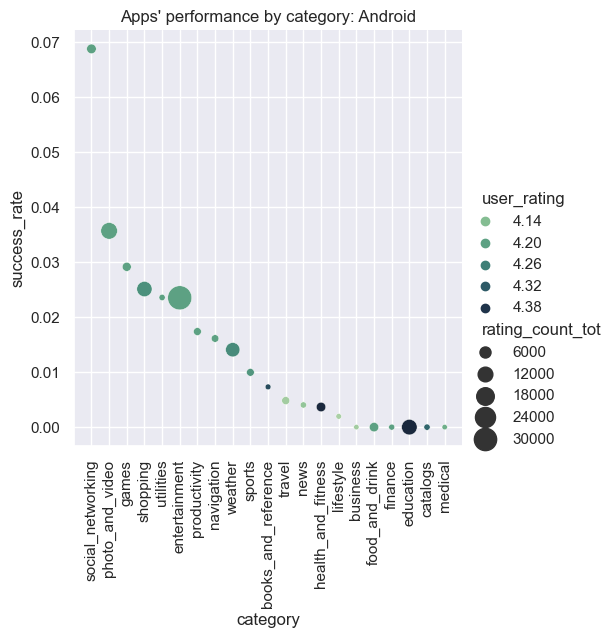

In [62]:
#(3) Diving into overperformers
data_ready_by_category=successful_by_col('category', 'android')
sns.relplot(data=data_ready_by_category, x=data_ready_by_category.index, y='success_rate', size='rating_count_tot', hue='user_rating', sizes=(15,300), palette="ch:r=-.5,l=.75")
plt.xticks(rotation=90)
plt.title("Apps' performance by category: Android")
plt.show()

The chart above preents us the statistics for the categories within the Android system. We can see that social networking, photo/video and games are the most successful apps overall; the most popular ones are entertainment, photo/video, education; whereas books/references, health/fitness, education are the best evaluated ones, meaning more potential for extra revenue.

In [63]:
#(3) Diving into overperformers
data_ready_android=data_ready[data_ready['os']=='android']
success_threshold_android=successful_by_col('category', 'android')['success_threshold_os'][1]
mask_successful_books_android = data_ready_android[data_ready_android['category']=='books_and_reference']['rating_count_tot']>success_threshold_android
data_ready_android[data_ready_android['category']=='books_and_reference'][mask_successful_books_android]

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os
143,Wattpad 📖 Free Books,books_and_reference,4.6,2915189,True,12,android
168,Bible,books_and_reference,4.7,2440695,True,12,android


In [64]:
#(3) Diving into overperformers
data_ready_android[data_ready_android['app'].str.contains('starbucks', flags=re.I)]

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os
626,Starbucks,food_and_drink,4.5,455496,True,4,android


In [65]:
#(3) Diving into overperformers
data_ready_android[data_ready_android['app'].str.contains('domino', flags=re.I)]

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os
338,Domino's Pizza USA,food_and_drink,4.7,1032935,True,4,android
4127,Dominos Game ✔️,games,4.1,2903,True,4,android
4163,Dr. Dominoes,games,4.0,2700,True,4,android


In [66]:
#(3) Diving into overperformers
data_ready_android[data_ready_android['app'].str.contains('[Dd]uolingo')]

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os
56,Duolingo: Learn Languages Free,games,4.7,6297590,True,4,android


In [67]:
#(3) Diving into overperformers
data_ready_android[data_ready_android['app'].str.contains('[Ff][Ii][Ff][Aa]')]

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os
111,FIFA Soccer,sports,4.2,3909032,True,4,android
409,FIFA 16 Soccer,sports,4.1,820577,True,4,android
742,"FIFA - Tournaments, Soccer News & Live Scores",sports,4.2,342912,True,4,android
834,EA SPORTS™ FIFA 18 Companion,sports,3.9,282727,True,4,android
5081,Fifa World Cup 2018: Photo Frame Editor & DP M...,photo_and_video,4.6,666,True,4,android


In [68]:
#(3) Diving into overperformers
data_ready_android[data_ready_android['app'].str.contains('^nba', flags=re.I)]

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os
216,NBA LIVE Mobile Basketball,sports,4.4,1690802,True,4,android
1398,NBA,sports,4.4,108318,True,4,android


Summing up grouping by category for Android:

* Agressive strategy (top 2%): social_networking, photo_and_video, games;
* Conservative strategy (best overall): entertainment, photo_and_video, shopping, education
* Most extra revenue potential: health_and_fitness, education, books_and_reference

Interesting to notice Duolingo outside 'education', and the Bile as the only book to make it to the top 2%.

### 7.3 Grouping by cont_rating_min_age for Android<a name="section7.3"></a>

* (1) The median number of users/rating by category
* (2) Rate of successful apps
* (3) Diving into overperformers

In [69]:
#(1) and (2)
successful_by_col('cont_rating_min_age', 'android')

,rating_count_tot,user_rating,app count,success_rate,success_threshold_os
cont_rating_min_age,,,,,
9,25952.0,4.30,289,0.058824,2339098
12,11810.0,4.25,980,0.038776,2339098
17,4315.0,4.19,376,0.029255,2339098
4,793.5,4.20,7218,0.015240,2339098


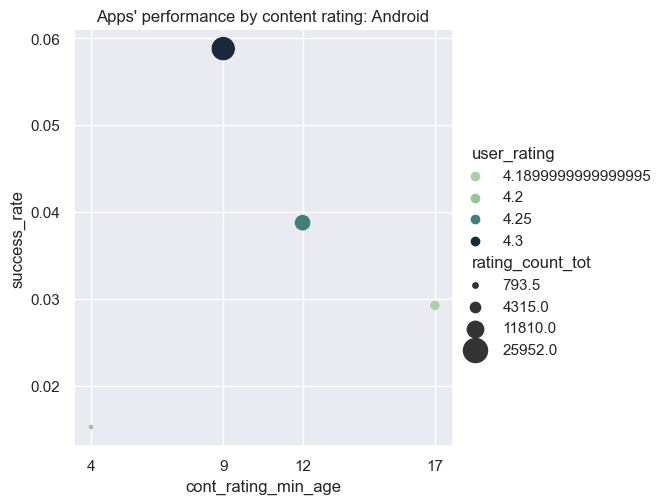

In [70]:
#(3) Diving into overperformers
data_ready_by_cont_rating_min_age=successful_by_col('cont_rating_min_age', 'android')
sns.relplot(data=data_ready_by_cont_rating_min_age, x=data_ready_by_cont_rating_min_age.index, y='success_rate', size='rating_count_tot', hue='user_rating', sizes=(15,300), palette="ch:r=-.5,l=.75")
plt.xticks(ticks=[4,9,12,17])
plt.title("Apps' performance by content rating: Android")
plt.show()

Summing up grouping by cont_rating_min_age for Android
* Agressive strategy (top 2%): 9+;
* Conservative strategy (best overall): 9+;
* Most extra revenue potential: 9+.  

## 8 Data Visualization and Analysis for iOS <a name="section8"></a>

### 8.1 Defining data and success for iOS<a name="section8.1"></a>

Henceforth, we will establish an absolute mark of what a successful app is for ios: being on the top 2% of user numbers.

### 8.2 Grouping by category for iOS<a name="section8.2"></a>

* (1) The median number of users/rating by category
* (2) Rate of successful apps
* (3) Diving into unexpected overperformers

In [71]:
#(1) and (2)
successful_by_col('category', 'ios')

,rating_count_tot,user_rating,app count,success_rate,success_threshold_os
category,,,,,
navigation,8196.5,3.75,6,0.166667,262241
music,3850.0,4.00,66,0.060606,262241
social_networking,4199.0,4.00,106,0.056604,262241
food_and_drink,1490.5,3.75,26,0.038462,262241
weather,289.0,4.00,28,0.035714,262241
books_and_reference,1188.0,4.00,32,0.031250,262241
health_and_fitness,2459.0,4.50,65,0.030769,262241
travel,798.5,4.00,40,0.025000,262241
news,373.0,3.50,43,0.023256,262241


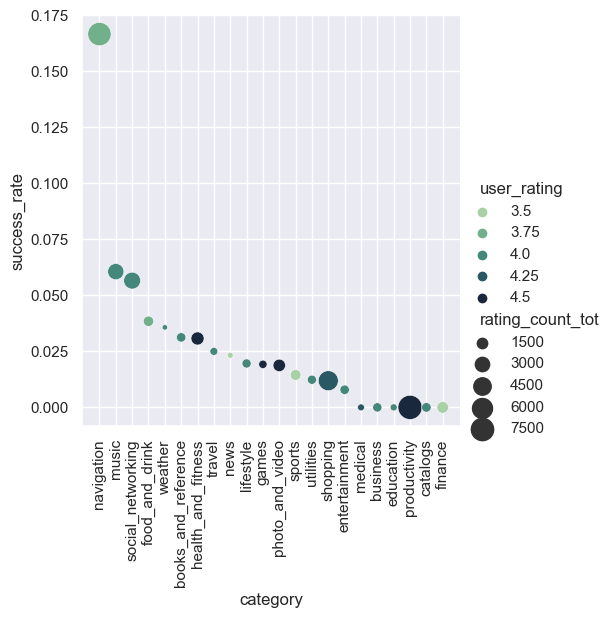

In [72]:
#(3)
data_ready_by_category_ios=successful_by_col('category', 'ios')
sns.relplot(data=data_ready_by_category_ios, x=data_ready_by_category_ios.index, y='success_rate', size='rating_count_tot', hue='user_rating', sizes=(15,300), palette="ch:r=-.5,l=.75")
plt.xticks(rotation=90)
plt.show()

In the chart above, we are presented with the apps performance by category for iOS. We can see the most successful ones are navigation, music and social_networking; the most popular ones are navigation, productivity and shopping; whereas the ones with better prospect of extra revenue are productivity, photo/video, health/fitness, games.

In [73]:
data_ready_ios=data_ready[data_ready['os']=='ios']
data_ready_ios[data_ready_ios['category']=='navigation']

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os
174,"Waze - GPS Navigation, Maps & Real-time Traffic",navigation,4.5,345046,True,4,ios
1693,Google Maps - Navigation & Transit,navigation,4.5,154911,True,12,ios
200,Geocaching®,navigation,3.5,12811,True,4,ios
1203,CoPilot GPS – Car Navigation & Offline Maps,navigation,4.0,3582,True,4,ios
280,ImmobilienScout24: Real Estate Search in Germany,navigation,3.5,187,True,4,ios
959,Railway Route Search,navigation,3.0,5,True,4,ios


In [74]:
success_threshold_ios=successful_by_col('category', 'ios')['success_threshold_os'][1]
mask_successful_books_ios=data_ready_ios[data_ready_ios['category']=='books_and_reference']['rating_count_tot']>success_threshold_ios
data_ready_ios[data_ready_ios['category']=='books_and_reference'][mask_successful_books_ios]

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os
4,Bible,books_and_reference,4.5,985920,True,4,ios


In [75]:
mask_succesful_music_ios=data_ready_ios[data_ready_ios['category']=='music']['rating_count_tot']>success_threshold_ios
data_ready_ios[data_ready_ios['category']=='music'][mask_succesful_music_ios]

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os
7,Pandora - Music & Radio,music,4.0,1126879,True,12,ios
178,Spotify Music,music,4.5,878563,True,12,ios
18,"Shazam - Discover music, artists, videos & lyrics",music,4.0,402925,True,12,ios
35,iHeartRadio – Free Music & Radio Stations,music,4.0,293228,True,12,ios


In [76]:
mask_successful_food_ios=data_ready_ios[data_ready_ios['category']=='food_and_drinks']['rating_count_tot']>success_threshold_ios
data_ready_ios[data_ready_ios['category']=='food_and_drinks'][mask_successful_food_ios]

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os


In [77]:
data_ready_ios[data_ready_ios['app'].str.contains('duolingo', flags=re.I)]

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os
1597,"Duolingo - Learn Spanish, French and more",education,4.5,162701,True,4,ios


In [78]:
data_ready_ios[data_ready_ios['app'].str.contains('fifa', flags=re.I)]

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os
5736,FIFA Mobile Soccer,games,4.0,15365,True,4,ios
6404,EA SPORTS™ FIFA 17 Companion,games,4.0,1137,True,4,ios


In [79]:
data_ready_ios[data_ready_ios['app'].str.contains('nba', flags=re.I)]

,app,category,user_rating,rating_count_tot,free,cont_rating_min_age,os
701,TuneIn Radio - MLB NBA Audiobooks Podcasts Music,music,4.5,110420,True,12,ios
232,NBA,sports,3.5,43682,True,4,ios
4657,NBA LIVE Mobile Basketball,games,4.0,40619,True,4,ios
968,Zen Pinball,games,4.5,6534,True,9,ios
6641,My NBA 2K17,games,3.0,1784,True,4,ios
4075,Pinball Breaker Forever,games,4.5,190,True,4,ios
6309,NBAmoji,sports,3.5,89,True,4,ios
4996,TraptionBakery,games,5.0,17,True,9,ios
3254,New baseball board app BasePinBall,games,3.0,5,True,4,ios


Summing up Grouping by category for ios:

* Agressive strategy (top 2%): navigation, food_and_drink, social_networking;
* Conservative strategy (best overall): navigation, productivity, shopping;
* Most extra revenue potential:  productivity, photo/video, health/fitness, lifestyle

Interesting to notice how popular Starbucks and Domino's are, and how unwell Fifa performed. 

### 8.3 Grouping by Cont_rating_min_age for iOS<a name="section8.3"></a>

* (1) The median number of users/rating by category
* (2) Rate of successful apps
* (3) Diving into unexpected overperformers

In [80]:
#(1) and (2) 
successful_by_col('cont_rating_min_age', 'ios')

,rating_count_tot,user_rating,app count,success_rate,success_threshold_os
cont_rating_min_age,,,,,
9,1296.0,4.5,343,0.026239,262241
12,2087.5,4.5,550,0.025455,262241
17,1198.0,4.0,207,0.024155,262241
4,935.0,4.0,2120,0.016509,262241


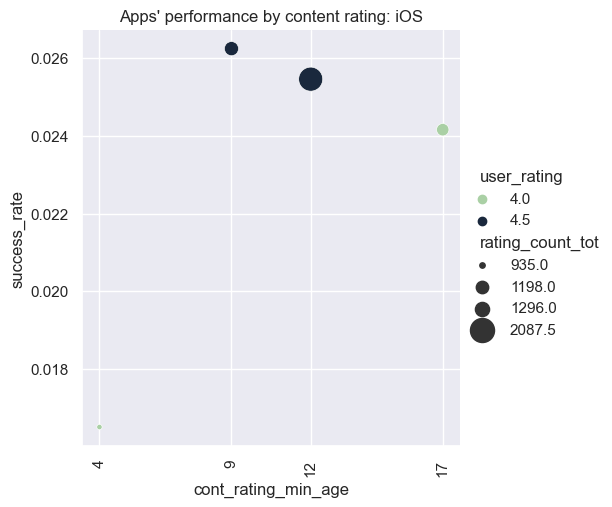

In [81]:
#(3)
data_ready_by_cont_rating_min_age_ios=successful_by_col('cont_rating_min_age', 'ios')
sns.relplot(data=data_ready_by_cont_rating_min_age_ios, x=data_ready_by_cont_rating_min_age_ios.index, y='success_rate', size='rating_count_tot', hue='user_rating', sizes=(15,300), palette="ch:r=-.5,l=.75")
plt.xticks(ticks=[4,9,12,17], rotation=90)
plt.title("Apps' performance by content rating: iOS")
plt.show()

Summing up Grouping by cont_rating_min_age for iOS:

* Agressive strategy (top 2%): 12+;
* Conservative strategy (best overall): 12+;
* Most extra revenue potential: 12+.

In apple store's market, 12 year-old apps perform better in all 3 parameters, differently from Android's.  

## 9. Conclusion <a name="section9"></a>

In this project, we profiled apps to direct our development team towards successful softwares given our two datasets for ios and android. We defined successful here as being top 2% number of users, and the success_rate guided us to the most appealing segmentations within each categorical variable. All limitations considered, we came up with the following:

Agressive strategy(top 2%):
* Operating system: Android

* Category: social_networking/communications/messenger and Bible apps are universally successful.
    - Android: photo_and_videos, shopping, games; 
    - iOS: navigation, "food_and_drink" and "social_networking"
* Content rating: 
    - Android= 9+;
    - iOS = 12+;

Conservative strategy(best overall):
* Category: 
    - iOS: navigation, productivity, shopping; 
    - Android: entertainment, photo_and_video, shopping, education.    
* Content_rating:
    - Android= 9+;
    - iOS = 12+;
    
Most extra revenue potential: 

    - Android: health_and_fitness, education, books_and_reference;
    
    - iOS: health_and_fitness, games, photo_and_video, productivity


It was interesting to notice some differences between markets:
* Despite being 24x the size of AppStore in users, Google has 49x successful apps.
* Google's success threshold is 10x that of Apple's, but their user base is 24x. This suggests that the AppStore is more saturated than GooglePlay, and therefore, a worse option for os when developing a successful app.
* Domino's in iOS had only 3x less users than in Android, and Starbucks only 33% less.
* There are 266x Fifa players in Android compared to iOS: these last two statistics suggest that iOS is relatively more popular in the US than over the rest of the globe.

Next steps:
* Do similar analysis, now grouping by Genres
* come up a standard classification to apply to both operating systems, guaranteeing compatibility;